In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
dataset=pd.read_excel("Employee_Data.xls")

In [12]:
dataset.head(10)

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
5,6,Elijah,Matthews,Accounting,26.0,5.0,15387
6,7,Bo,Mcleod,Customer Relations,24.0,6.0,34117
7,8,Zena,Melendez,Customer Relations,29.0,2.0,16099
8,9,Tucker,Michael,Sales and Marketing,29.0,5.0,42105
9,10,Lucas,Rowe,Customer Relations,30.0,6.0,11891


In [13]:
#Q: how many data_points and features we have?
print(dataset.shape)

(100, 7)


# handling missing value for dataset

In [14]:
#Q: what are the columns names given in our dataset?
print(dataset.columns)

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')


In [15]:
#Q: how many data points are given in the class "Department"
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [16]:
#information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [17]:
#check the missing data
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [18]:
dataset.isnull().any()

Employee Id    False
First Name     False
Last Name      False
Department      True
Age             True
Experience      True
Salary         False
dtype: bool

In [19]:
#slice the dataset as per ind and dep variable
#x=dataset.iloc[:,3:6] #all rows and colmns from 3 to 6    # it will give dataframe
x=dataset.iloc[:,3:6].values    # it will give array

In [20]:
x

array([['Sales and Marketing', 28.0, 3.0],
       ['Sales and Marketing', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Accounting', 27.0, 0.0],
       ['Accounting', 26.0, 5.0],
       ['Customer Relations', 24.0, 6.0],
       ['Customer Relations', 29.0, 2.0],
       ['Sales and Marketing', 29.0, 5.0],
       ['Customer Relations', 30.0, 6.0],
       ['Accounting', 26.0, 5.0],
       ['Sales and Marketing', 26.0, 6.0],
       ['Accounting', 24.0, 5.0],
       ['Accounting', 22.0, 2.0],
       ['Sales and Marketing', 25.0, 3.0],
       ['Accounting', 25.0, nan],
       ['Customer Relations', 22.0, nan],
       ['Accounting', 25.0, nan],
       ['Accounting', 27.0, nan],
       [nan, 25.0, nan],
       [nan, 22.0, nan],
       [nan, 22.0, nan],
       [nan, 24.0, nan],
       [nan, 27.0, nan],
       [nan, 22.0, nan],
       [nan, 33.0, 13.0],
       [nan, 36.0, 7.0],
       [nan, 35.0, 10.0],
       [nan, 33.0, 12.0],
       [

In [21]:
y=dataset.iloc[:,6].values  # all rows and only 6th column

In [22]:
y

array([32889, 15944, 40343, 19018, 24795, 15387, 34117, 16099, 42105,
       11891, 34687, 23549, 29110, 33435, 11830, 44065, 13266, 16631,
       29886, 30464, 14943, 18632, 38183, 43093, 26573, 51228, 57902,
       54233, 70010, 74683, 53867, 60117, 72055, 50013, 50118, 72318,
       53828, 58362, 63391, 62983, 65939, 51715, 54250, 50462, 64418,
       60164, 66528, 57278, 71607, 61222, 68388, 94704, 89493, 94310,
       81615, 84306, 77452, 76904, 90798, 86261, 78332, 84881, 76528,
       83524, 89258, 75431, 91870, 76708, 95222, 90802, 86277, 77330,
       85286, 90930, 88833, 95908, 92365, 93854, 85336, 79898, 84708,
       88381, 93206, 91795, 96432, 83300, 94778, 82283, 97056, 87654,
       89875, 98180, 84185, 79509, 97990, 79077, 81187, 83847, 89158,
       91645], dtype=int64)

In [23]:
# Handle missing value by manual approach or using library
dataset['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [24]:
# manual approach
dataset['Department']=dataset['Department'].fillna('Sales and Marketing')

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [26]:
pd.DataFrame(x).isnull().sum()

0    19
1    18
2    10
dtype: int64

In [27]:
# use sklearn library (to handle missing value-simple imputer)
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy = "most_frequent")
x[:,0:1]=impute.fit_transform(x[:,0:1])

In [28]:
pd.DataFrame(x).isnull().sum()

0     0
1    18
2    10
dtype: int64

<AxesSubplot:ylabel='Age'>

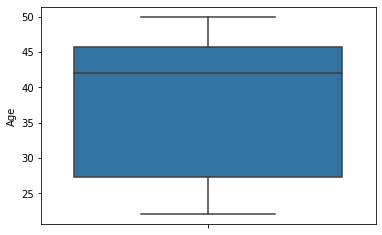

In [5]:
#check outlier and then decide mean/median approach
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='Age',data=dataset)

<AxesSubplot:ylabel='Experience'>

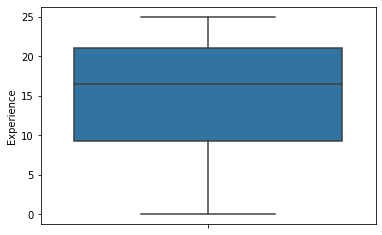

In [6]:
sns.boxplot(y='Experience',data=dataset)

In [32]:
# manual approach 
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean()) #if outlier not exist
# dataset['Age']=dataset['Age'].fillna(dataset['Age'].median()) #if outlier exist

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          100 non-null    float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [34]:
#similarily for experience
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].mean())

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   100 non-null    object 
 4   Age          100 non-null    float64
 5   Experience   100 non-null    float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [36]:
#sklearn concept to handle missing data(mean/median)
from sklearn.impute import SimpleImputer

simple_impute=SimpleImputer(strategy='mean')
x[:,1:3]=simple_impute.fit_transform(x[:,1:3])

#simple_impute=SimpleImputer(strategy='median')  #if outlier exist
x[:,2:3]=simple_impute.fit_transform(x[:,2:3])

In [37]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
dtype: int64

# label encoder,onehot encoder,dummy variable

In [38]:
dataset2=dataset.iloc[:,3:6]
dataset2

,Department,Age,Experience
0,Sales and Marketing,28.0,3.0
1,Sales and Marketing,22.0,1.0
2,Customer Relations,22.0,1.0
3,Customer Relations,22.0,1.0
4,Accounting,27.0,0.0
...,...,...,...
95,Sales and Marketing,47.0,22.0
96,Sales and Marketing,46.0,20.0
97,Customer Relations,44.0,18.0
98,Customer Relations,47.0,22.0


In [1]:
#manual approach---first do type casting
dataset2["Department"]=dataset2["Department"].astype('category')
#label encoder
dataset2['Department']=dataset2['Department'].cat.codes
# convert into number----one hot encoder
dataset3=pd.get_dummies(dataset2,columns=["Department"])

NameError: name 'dataset2' is not defined

In [40]:
dataset2

,Department,Age,Experience
0,2,28.0,3.0
1,2,22.0,1.0
2,1,22.0,1.0
3,1,22.0,1.0
4,0,27.0,0.0
...,...,...,...
95,2,47.0,22.0
96,2,46.0,20.0
97,1,44.0,18.0
98,1,47.0,22.0


In [41]:
dataset3

,Age,Experience,Department_0,Department_1,Department_2
0,28.0,3.0,0,0,1
1,22.0,1.0,0,0,1
2,22.0,1.0,0,1,0
3,22.0,1.0,0,1,0
4,27.0,0.0,1,0,0
...,...,...,...,...,...
95,47.0,22.0,0,0,1
96,46.0,20.0,0,0,1
97,44.0,18.0,0,1,0
98,47.0,22.0,0,1,0


In [42]:
dataset3=dataset3.iloc[:,0:4]
dataset3

,Age,Experience,Department_0,Department_1
0,28.0,3.0,0,0
1,22.0,1.0,0,0
2,22.0,1.0,0,1
3,22.0,1.0,0,1
4,27.0,0.0,1,0
...,...,...,...,...
95,47.0,22.0,0,0
96,46.0,20.0,0,0
97,44.0,18.0,0,1
98,47.0,22.0,0,1


In [43]:
x

array([['Sales and Marketing', 28.0, 3.0],
       ['Sales and Marketing', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Accounting', 27.0, 0.0],
       ['Accounting', 26.0, 5.0],
       ['Customer Relations', 24.0, 6.0],
       ['Customer Relations', 29.0, 2.0],
       ['Sales and Marketing', 29.0, 5.0],
       ['Customer Relations', 30.0, 6.0],
       ['Accounting', 26.0, 5.0],
       ['Sales and Marketing', 26.0, 6.0],
       ['Accounting', 24.0, 5.0],
       ['Accounting', 22.0, 2.0],
       ['Sales and Marketing', 25.0, 3.0],
       ['Accounting', 25.0, 14.766666666666667],
       ['Customer Relations', 22.0, 14.766666666666667],
       ['Accounting', 25.0, 14.766666666666667],
       ['Accounting', 27.0, 14.766666666666667],
       ['Sales and Marketing', 25.0, 14.766666666666667],
       ['Sales and Marketing', 22.0, 14.766666666666667],
       ['Sales and Marketing', 22.0, 14.766666666666667],
       ['Sales and Marketin

In [44]:
# sklearn with encoding concept
# label encoder concept by using sklearn library
 
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
x[:,0]=encoding.fit_transform(x[:,0])

In [45]:
pd.DataFrame(x).head(10)

,0,1,2
0,2,28.0,3.0
1,2,22.0,1.0
2,1,22.0,1.0
3,1,22.0,1.0
4,0,27.0,0.0
5,0,26.0,5.0
6,1,24.0,6.0
7,1,29.0,2.0
8,2,29.0,5.0
9,1,30.0,6.0


In [46]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columntransfer=ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [47]:
columntransfer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [48]:
x=columntransfer.fit_transform(x)

In [49]:
x

array([[0.0, 0.0, 1.0, 28.0, 3.0],
       [0.0, 0.0, 1.0, 22.0, 1.0],
       [0.0, 1.0, 0.0, 22.0, 1.0],
       [0.0, 1.0, 0.0, 22.0, 1.0],
       [1.0, 0.0, 0.0, 27.0, 0.0],
       [1.0, 0.0, 0.0, 26.0, 5.0],
       [0.0, 1.0, 0.0, 24.0, 6.0],
       [0.0, 1.0, 0.0, 29.0, 2.0],
       [0.0, 0.0, 1.0, 29.0, 5.0],
       [0.0, 1.0, 0.0, 30.0, 6.0],
       [1.0, 0.0, 0.0, 26.0, 5.0],
       [0.0, 0.0, 1.0, 26.0, 6.0],
       [1.0, 0.0, 0.0, 24.0, 5.0],
       [1.0, 0.0, 0.0, 22.0, 2.0],
       [0.0, 0.0, 1.0, 25.0, 3.0],
       [1.0, 0.0, 0.0, 25.0, 14.766666666666667],
       [0.0, 1.0, 0.0, 22.0, 14.766666666666667],
       [1.0, 0.0, 0.0, 25.0, 14.766666666666667],
       [1.0, 0.0, 0.0, 27.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 25.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 22.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 22.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 24.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 27.0, 14.766666666666667],
       [0.0, 0.0, 1.0, 22

In [50]:
x_fs=pd.DataFrame(x)
x_fs

,0,1,2,3,4
0,0.0,0.0,1.0,28.0,3.0
1,0.0,0.0,1.0,22.0,1.0
2,0.0,1.0,0.0,22.0,1.0
3,0.0,1.0,0.0,22.0,1.0
4,1.0,0.0,0.0,27.0,0.0
...,...,...,...,...,...
95,0.0,0.0,1.0,47.0,22.0
96,0.0,0.0,1.0,46.0,20.0
97,0.0,1.0,0.0,44.0,18.0
98,0.0,1.0,0.0,47.0,22.0


# standardisation

In [51]:
from sklearn.preprocessing import StandardScaler
x_sc= StandardScaler()
x_fs_stand = x_sc.fit_transform(x_fs)
x_fs_stand

array([[-6.08163641e-01, -5.61951487e-01,  1.02020406e+00,
        -1.16485118e+00, -1.81044925e+00],
       [-6.08163641e-01, -5.61951487e-01,  1.02020406e+00,
        -1.86547071e+00, -2.11817433e+00],
       [-6.08163641e-01,  1.77951304e+00, -9.80196059e-01,
        -1.86547071e+00, -2.11817433e+00],
       [-6.08163641e-01,  1.77951304e+00, -9.80196059e-01,
        -1.86547071e+00, -2.11817433e+00],
       [ 1.64429429e+00, -5.61951487e-01, -9.80196059e-01,
        -1.28162110e+00, -2.27203688e+00],
       [ 1.64429429e+00, -5.61951487e-01, -9.80196059e-01,
        -1.39839102e+00, -1.50272416e+00],
       [-6.08163641e-01,  1.77951304e+00, -9.80196059e-01,
        -1.63193087e+00, -1.34886162e+00],
       [-6.08163641e-01,  1.77951304e+00, -9.80196059e-01,
        -1.04808125e+00, -1.96431179e+00],
       [-6.08163641e-01, -5.61951487e-01,  1.02020406e+00,
        -1.04808125e+00, -1.50272416e+00],
       [-6.08163641e-01,  1.77951304e+00, -9.80196059e-01,
        -9.31311332e-01

In [43]:
from sklearn.preprocessing import Normalizer
x_nr=Normalizer()
x_fs_norm=x_nr.fit_transform(x_fs)

In [44]:
x_fs_norm

array([[0.        , 0.        , 0.03548867, 0.99368282, 0.10646602],
       [0.        , 0.        , 0.04536092, 0.99794027, 0.04536092],
       [0.        , 0.04536092, 0.        , 0.99794027, 0.04536092],
       [0.        , 0.04536092, 0.        , 0.99794027, 0.04536092],
       [0.03701166, 0.        , 0.        , 0.99931483, 0.        ],
       [0.03774257, 0.        , 0.        , 0.98130676, 0.18871284],
       [0.        , 0.04038962, 0.        , 0.96935087, 0.24233772],
       [0.        , 0.03438071, 0.        , 0.99704054, 0.06876142],
       [0.        , 0.        , 0.03396178, 0.98489164, 0.1698089 ],
       [0.        , 0.03266858, 0.        , 0.98005728, 0.19601146],
       [0.03774257, 0.        , 0.        , 0.98130676, 0.18871284],
       [0.        , 0.        , 0.03745029, 0.97370765, 0.22470177],
       [0.04075696, 0.        , 0.        , 0.97816698, 0.20378479],
       [0.04522156, 0.        , 0.        , 0.99487439, 0.09044313],
       [0.        , 0.        , 0.

# Outlier Treatment and Imbalanced

In [45]:
#IQR=Q3-Q1
#+VE OUTLIER=Q3+1.5*Q2
#-VE OUTLIER=Q1-1.5*Q2
#Q1=(n+1)/4
#Q2=(n+1)/2
#Q3=(3*(n+1))/4
#Q4=(4*(n+1))/4....

In [46]:
mydata=pd.read_excel("OutlierData.xlsx")

In [47]:
mydata.head()

,Department,Age,Experience
0,HR,21,1
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11


<AxesSubplot:ylabel='Age'>

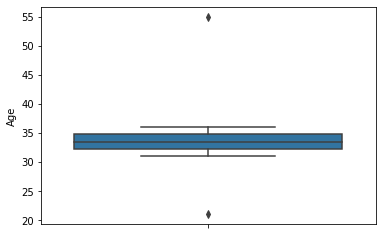

In [48]:
sns.boxplot(y="Age",data=mydata)

<AxesSubplot:ylabel='Experience'>

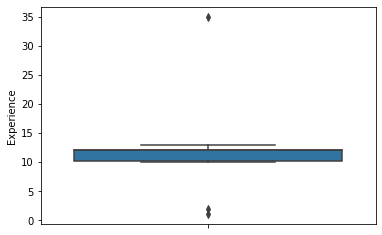

In [49]:
sns.boxplot(y="Experience",data=mydata)

In [50]:
Q1=mydata.quantile(0.25)
Q3=mydata.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)

Age           32.25
Experience    10.25
Name: 0.25, dtype: float64
Age           34.75
Experience    12.00
Name: 0.75, dtype: float64
Age           2.50
Experience    1.75
dtype: float64


In [51]:
mydata_outlier=mydata[~((mydata<(Q1-1.5*IQR))|(mydata>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-51-7d897095a067>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mydata_outlier=mydata[~((mydata<(Q1-1.5*IQR))|(mydata>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-51-7d897095a067>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mydata_outlier=mydata[~((mydata<(Q1-1.5*IQR))|(mydata>(Q3+1.5*IQR))).any(axis=1)]


<AxesSubplot:ylabel='Age'>

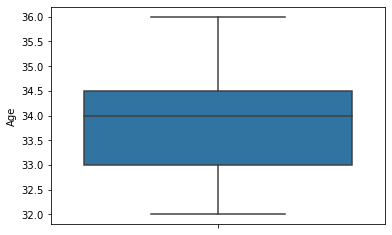

In [52]:
sns.boxplot(y="Age",data=mydata_outlier)

<AxesSubplot:ylabel='Experience'>

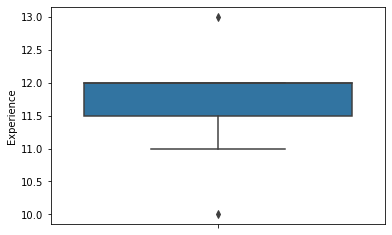

In [76]:
sns.boxplot(y="Experience",data=mydata_outlier)

# Imbalanced dataset

In [52]:
credit=pd.read_csv("creditcard.csv")
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
credit.isnull().sum()

Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13       18
V14        0
V15        0
V16        0
V17        0
V18        0
V19       16
V20        0
V21        0
V22        0
V23        0
V24        0
V25       19
V26        0
V27        0
V28        0
Amount     0
Class      0
dtype: int64

In [54]:
credit.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13        True
V14       False
V15       False
V16       False
V17       False
V18       False
V19        True
V20       False
V21       False
V22       False
V23       False
V24       False
V25        True
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [55]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284789 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284791 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [56]:
# to get how many rows and clmns
print(credit.shape)

(284807, 31)


In [57]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [58]:
!pip install imblearn

^C


In [59]:
import imblearn
# oversampling
# undersampling
# class-weight

In [60]:
x=credit.iloc[:,:-1]
y=credit.iloc[:,-1]

In [61]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [121]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# size by default 25%-test and 75%-train

In [64]:
print(x_train.shape)
print(x_train.shape)
print(y_train.shape)
print(y_train.shape)

(227845, 30)
(227845, 30)
(227845,)
(227845,)


In [126]:
# target is Majority class
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
x_under,y_under=under.fit_resample(x,y)

In [127]:
print(x_under.shape)
print(y_under.shape)

(984, 30)
(984,)


In [133]:
# target is minority class
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x,y) 


In [134]:
print(x_over.shape)
print(y_over.shape)

(568630, 30)
(568630,)


In [137]:
# synthetic Minority Oversampling Technique(SMOTE)
from imblearn.over_sampling import SMOTE

smote=SMOTE()

# fit predictor and target variable
x_smote,y_smote=smote.fit_resample(x,y)
print(x_smote.shape)
print(y_smote.shape)

(568630, 30)
(568630,)


In [142]:
# NearMiss is an under_sampling technique.
#Instead of resampling the Minority Class, using a distance, this will make the majority class equal to the minority class.

from imblearn.under_sampling import NearMiss

nm=NearMiss()

x_nm,y_nm=nm.fit_resample(x,y)
print(x_nm.shape)
print(y_nm.shape)

(984, 30)
(984,)



# Matplotlib Concepts

In [2]:
import numpy as np

x=np.linspace(0,5,11)
y=x**2

In [3]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [4]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

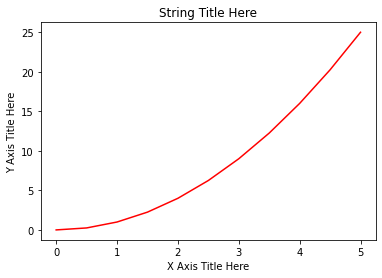

In [5]:
import matplotlib.pyplot as plt

plt.plot(x,y,'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

In [6]:
year=[2015,2016,2017,2018,2019]
sales=[4356,4432,3333,2322,4323]
profit=[453,223,344,433,233]

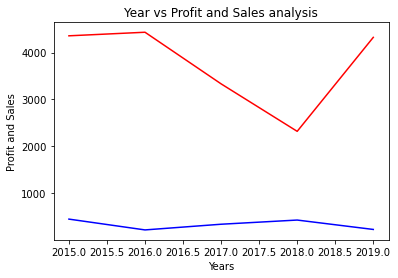

In [7]:
plt.plot(year,sales,'red')
plt.plot(year,profit,'blue')
plt.title('Year vs Profit and Sales analysis')
plt.xlabel('Years')
plt.ylabel('Profit and Sales')
plt.show()

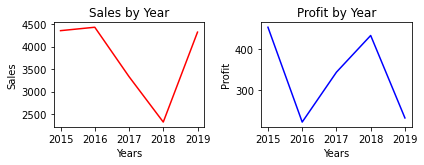

In [8]:
plt.subplot(2,2,1)
plt.plot(year,sales,'red')
#plt.plot(year,sales,'r--')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales by Year')

plt.subplot(2,2,2)
plt.plot(year,profit,'blue')
#plt.plot(year,profit,'g*-')
plt.xlabel('Years')
plt.ylabel('Profit')
plt.title('Profit by Year')
plt.tight_layout()

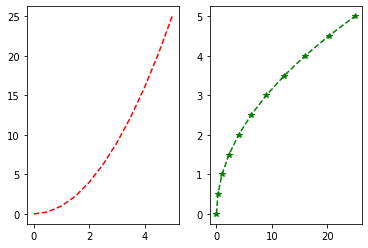

In [9]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x,y,'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y,x,'g*--')

Text(0.5, 1.0, 'Title')

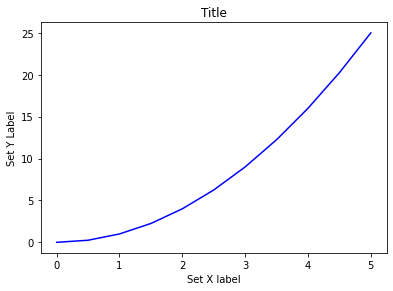

In [168]:
# Create Figure(empty canvas)
fig=plt.figure()

#Add set of axes to figure
axes= fig.add_axes([0.1,0.1,0.8,0.8])
# Left,bottom,width,height (range 0 to 1)

#plot on that set of axes
axes.plot(x,y,'b')
axes.set_xlabel('Set X label')  # Notice the use of set_ to begin methods
axes.set_ylabel('Set Y Label')
axes.set_title('Title')

Text(0.5, 1.0, 'Axes 2 Title')

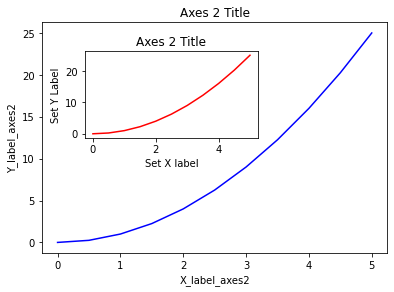

In [173]:
# Creates blank canvas
fig=plt.figure()

axes1= fig.add_axes([0.1,0.1,0.8,0.8])  #main axis
axes2= fig.add_axes([0.2,0.5,0.4,0.3])  #inset axis

# Larger Figure Axes 1
axes1.plot(x,y,'b-')
axes1.set_xlabel('X_label_axes2') 
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

#Insert Figure Axes 2
axes2.plot(x,y,'r-')
axes2.set_xlabel('Set X label')  
axes2.set_ylabel('Set Y Label')
axes2.set_title('Axes 2 Title')

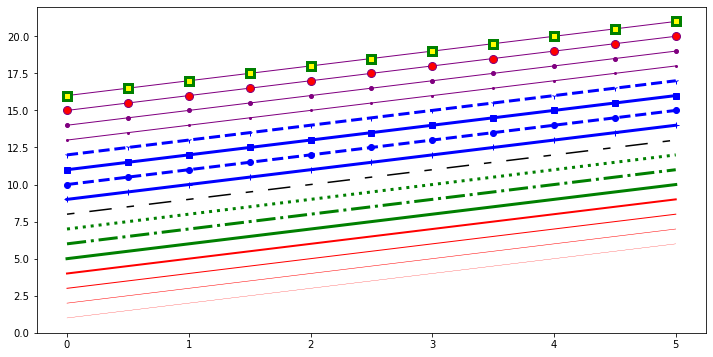

In [183]:
fig,ax=plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='red',linewidth=0.25)
ax.plot(x, x+2, color='red',linewidth=0.50)
ax.plot(x, x+3, color='red',linewidth=1.00)
ax.plot(x, x+4, color='red',linewidth=2.00)

# possible linestype options '-','-.',':','steps'
ax.plot(x, x+5, color='green',lw=3,linestyle='-')
ax.plot(x, x+6, color='green',lw=3,linestyle='-.')
ax.plot(x, x+7, color='green',lw=3,linestyle=':')

# custom dash
line,=ax.plot(x, x+8,color='black',lw=1.50)
line.set_dashes([5,10,15,10]) # format: line length,space length,...

# possible marker symbols: marker='+','o','*','s',',','.','1','2','3',...
ax.plot(x,x+9,color='blue',lw=3,ls='-',marker='+')
ax.plot(x,x+10,color='blue',lw=3,ls='--',marker='o')
ax.plot(x,x+11,color='blue',lw=3,ls='-',marker='s')
ax.plot(x,x+12,color='blue',lw=3,ls='--',marker='1')

# marker size and color
ax.plot(x,x+13,color='purple',lw=1,ls='-',marker='o',markersize=2)
ax.plot(x,x+14,color='purple',lw=1,ls='-',marker='o',markersize=4)
ax.plot(x,x+15,color='purple',lw=1,ls='-',marker='o',markersize=8, markerfacecolor='red')
ax.plot(x,x+16,color='purple',lw=1,ls='-',marker='s',markersize=8,markerfacecolor='yellow',markeredgewidth=3,markeredgecolor='green')

## vizualisation with seaborn

In [15]:
import seaborn as sns
%matplotlib inline


In [16]:
tips=sns.load_dataset('tips')

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# lmplot()

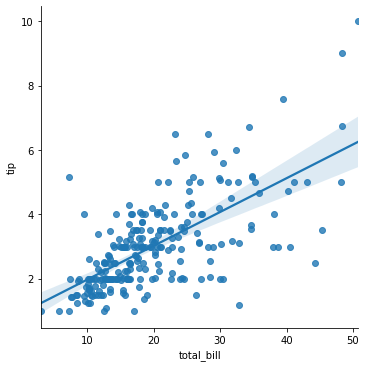

In [18]:
sns.lmplot(x='total_bill',y='tip',data=tips)
plt.show()

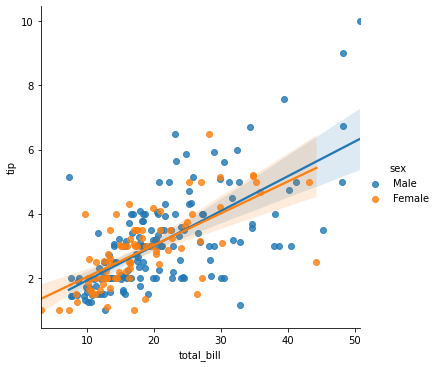

In [19]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex') #'hue' means how many unique variable there that much lines will come

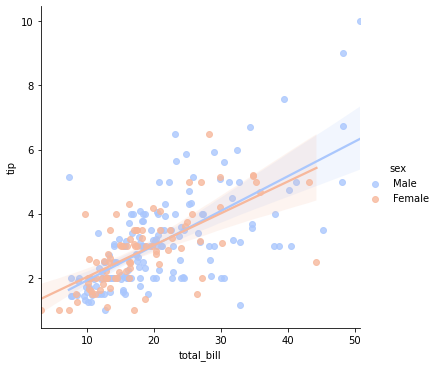

In [20]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

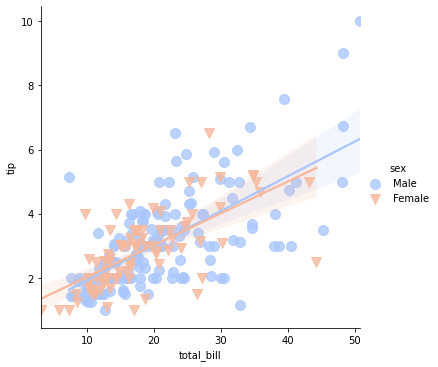

In [21]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',markers=['o','v'],scatter_kws={'s':100})

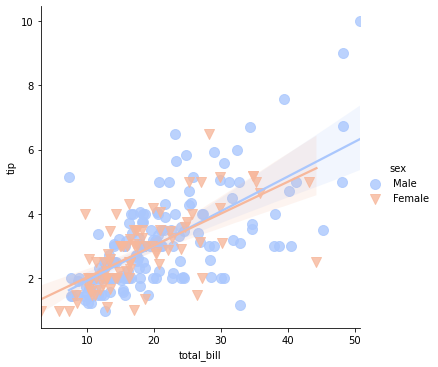

In [22]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',markers=['o','v'],scatter_kws={'s':100})

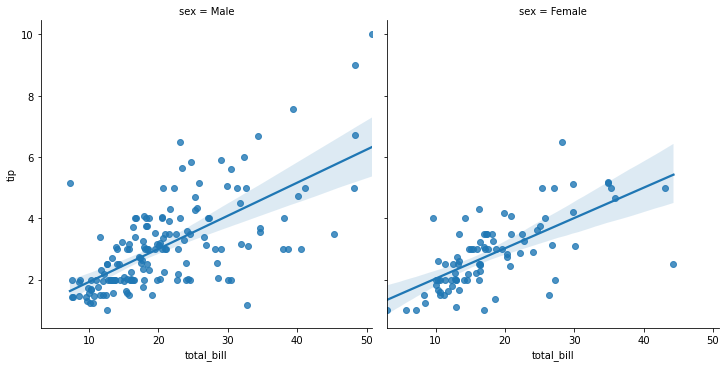

In [23]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

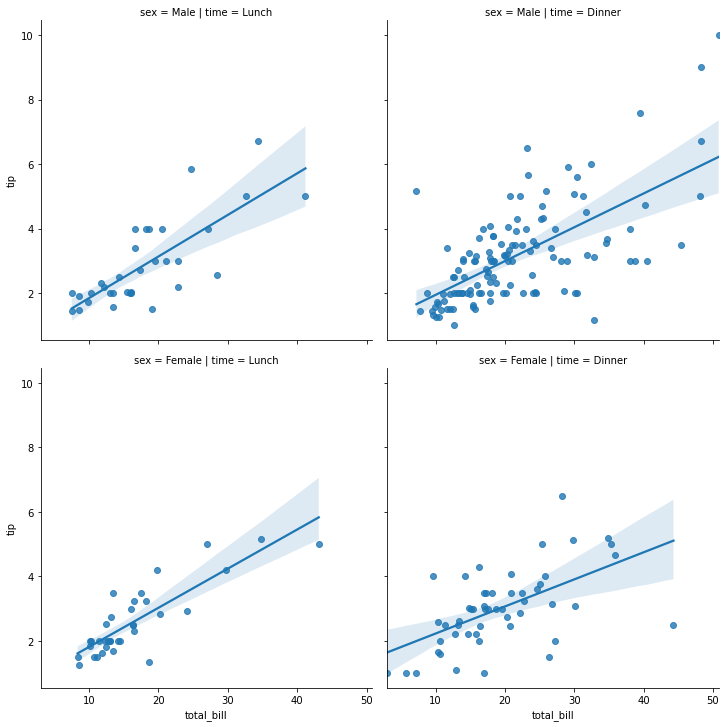

In [24]:
sns.lmplot(x='total_bill',y='tip',row='sex',col='time',data=tips)

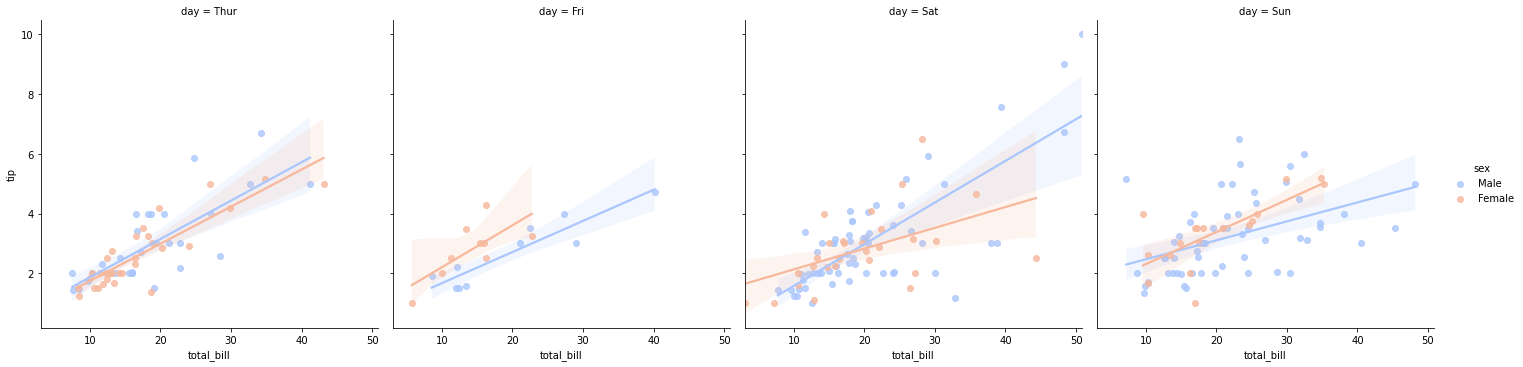

In [25]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

C:\Users\SRILEKYA\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


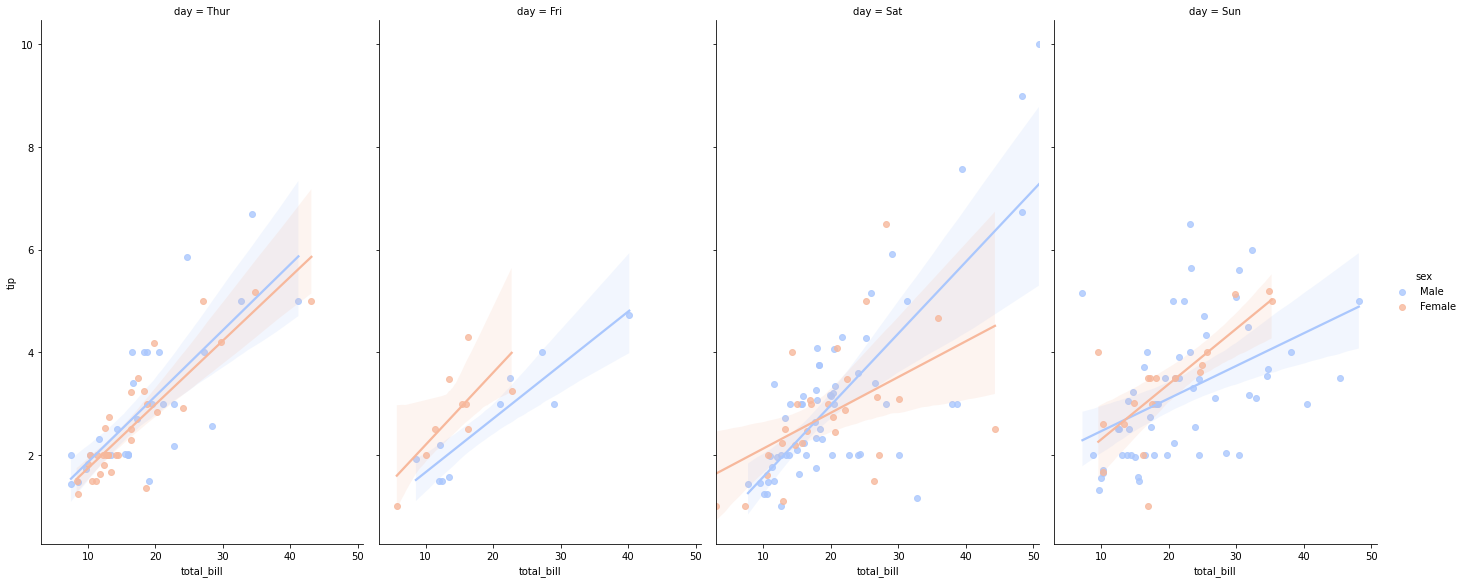

In [26]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',aspect=0.6,size=8)

<AxesSubplot:xlabel='sex', ylabel='count'>

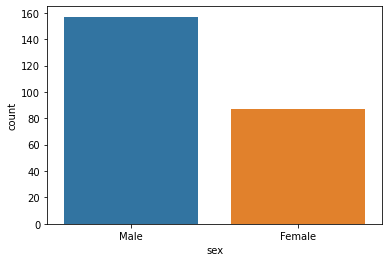

In [27]:
# countplot/histogram
sns.countplot(x='sex',data=tips)

C:\Users\SRILEKYA\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


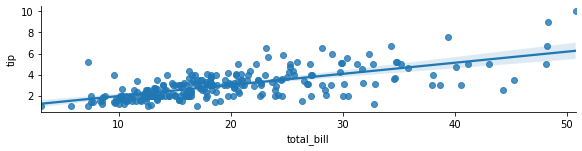

In [28]:
#Grid type plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

In [7]:
iris=sns.load_dataset('iris')

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

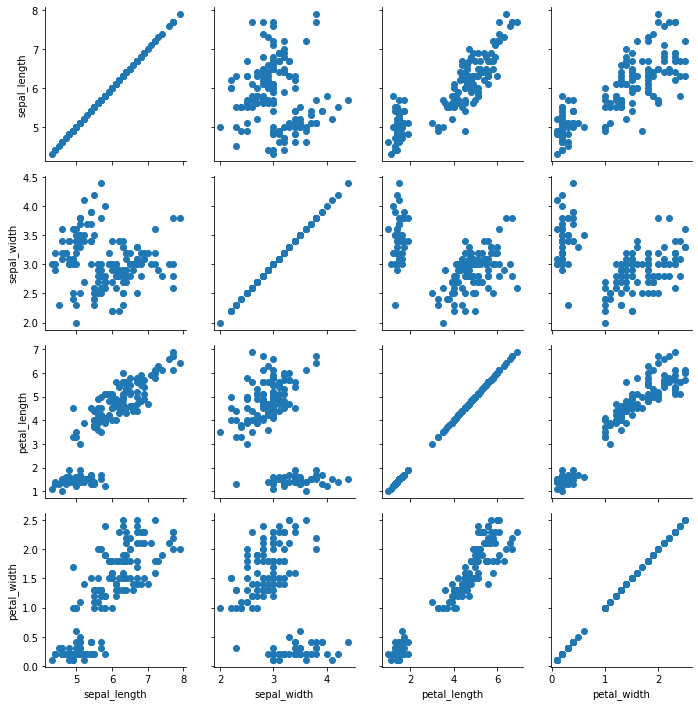

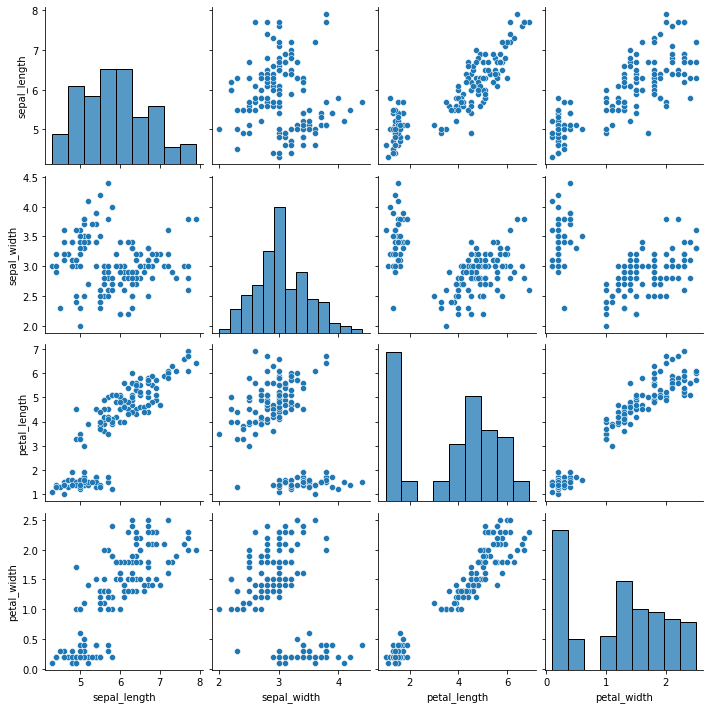

In [10]:
# then you map to the grid
g= sns.PairGrid(iris)
g.map(plt.scatter)

sns.pairplot(iris)

In [ ]:
# Correlation(-1 to +1)
# -0.6 to -0.2-->weak correlation
# -0.6 to -1-->strong correlation
# +0.2 to +0.6-->weak correlation
# +0.6 to +1-->strong correlation
# -0.2 to +0.2-->no correlation/ neutral

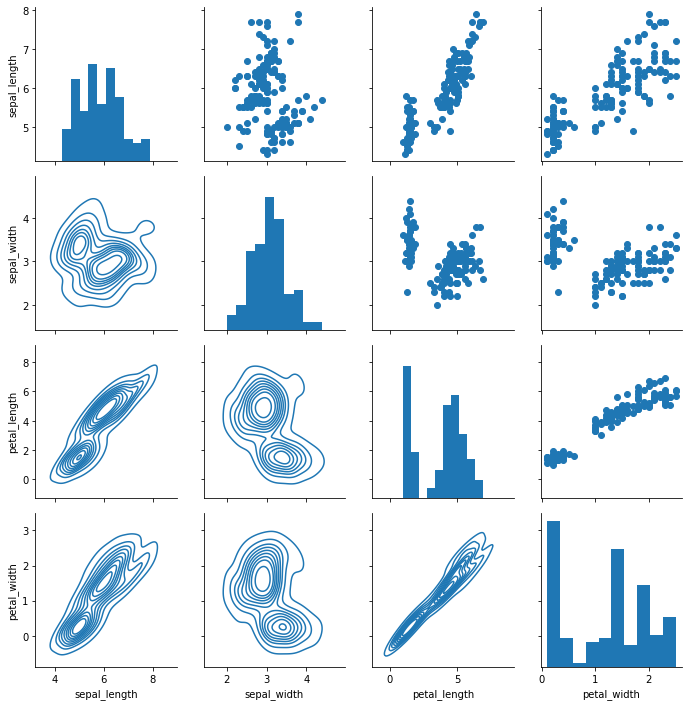

In [13]:
#map to upper, lower, and diagonal
g=sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)# kde--> kernal density estimation 

C:\Users\SRILEKYA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

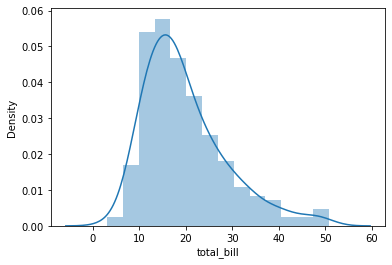

In [29]:
# distribution plot
sns.distplot(tips['total_bill'])

In [ ]:
# if my pde function is not symmetrical then there is outlier
# the curve in the output above is the pde func
#symmetrical means then --->mean=median=mode

C:\Users\SRILEKYA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

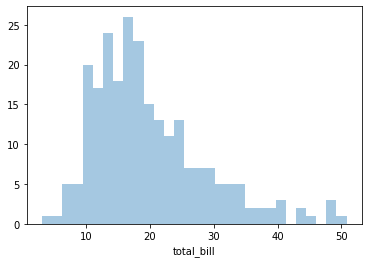

In [30]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

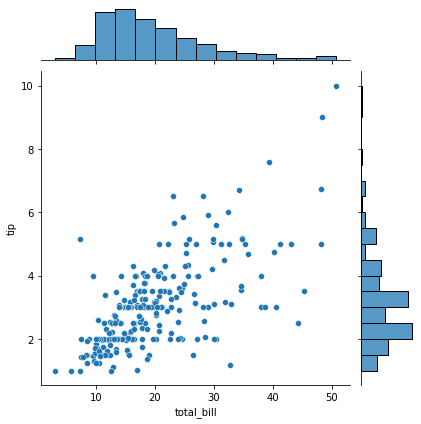

In [31]:
# join plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

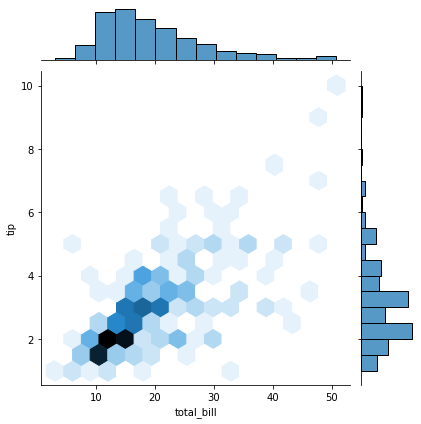

In [33]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

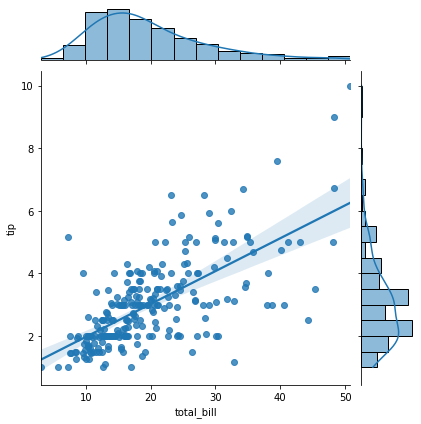

In [34]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

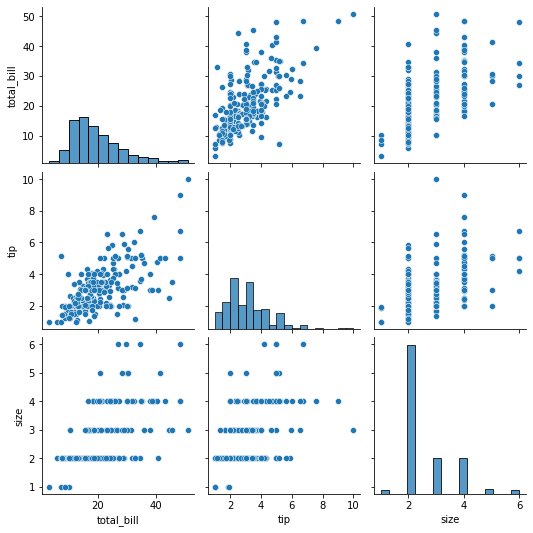

In [35]:
sns.pairplot(tips)

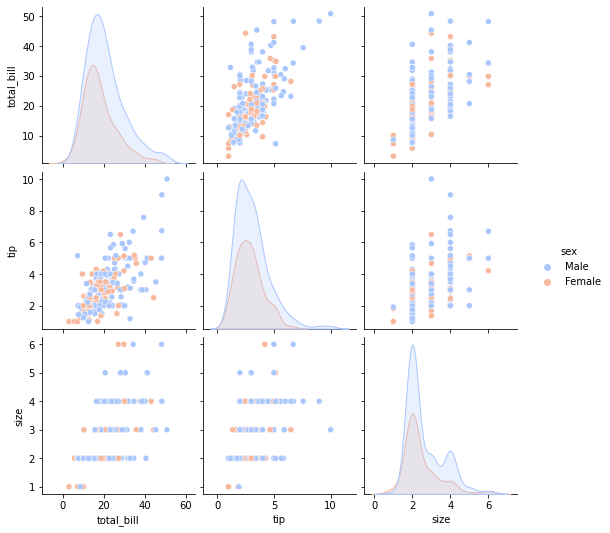

In [37]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

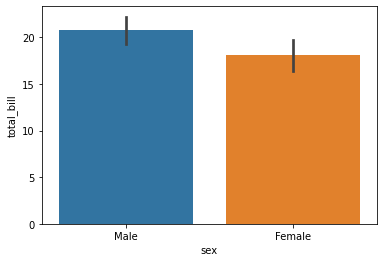

In [39]:
# bar plot
sns.barplot(x='sex',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

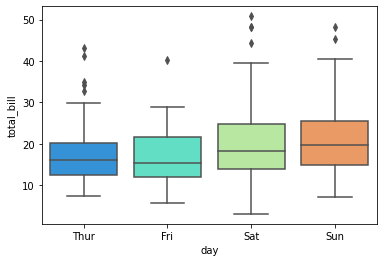

In [40]:
# box plot
sns.boxplot(x='day',y='total_bill',data=tips,palette='rainbow')

<AxesSubplot:>

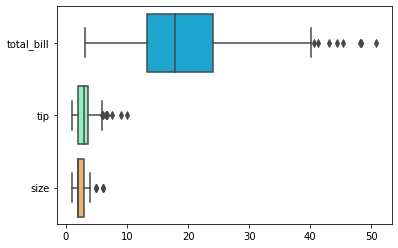

In [42]:
# can do entire dataframe with orient='h' (to get boxplot in horozontal veiw)
sns.boxplot(data=tips,palette='rainbow',orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

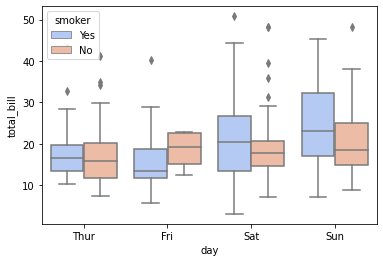

In [43]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='coolwarm')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

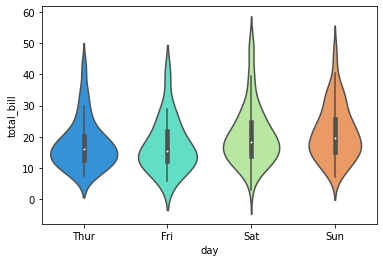

In [44]:
# violin plot
sns.violinplot(x='day', y='total_bill', data=tips, palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

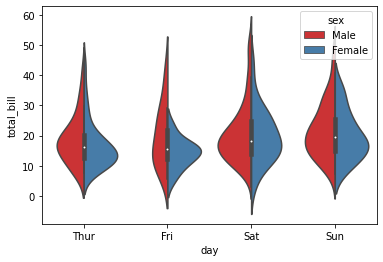

In [48]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex',split=True, palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

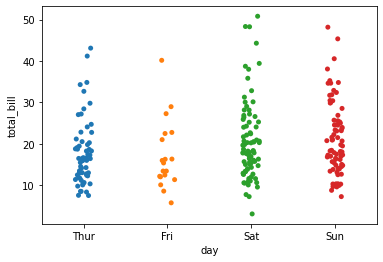

In [50]:
# strip plot
sns.stripplot(x='day', y='total_bill', data=tips)

C:\Users\SRILEKYA\anaconda3\lib\site-packages\seaborn\categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

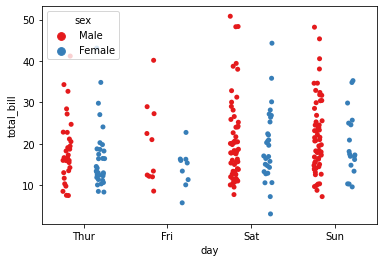

In [51]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex',palette='Set1',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

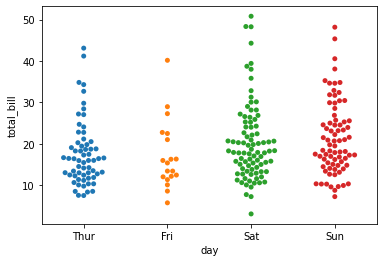

In [53]:
# swarm plot
sns.swarmplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='tip', ylabel='day'>

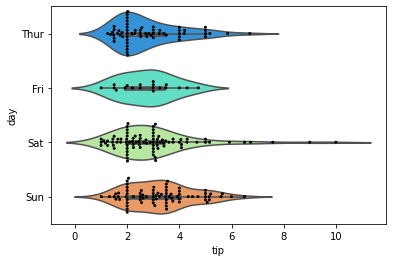

In [58]:
sns.violinplot(x='tip', y='day', data=tips, palette='rainbow')
sns.swarmplot(x='tip', y='day', data=tips,color='black',size=3)

In [56]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

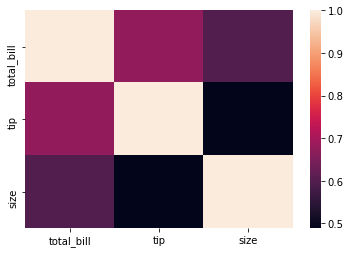

In [57]:
sns.heatmap(tips.corr())

<AxesSubplot:>

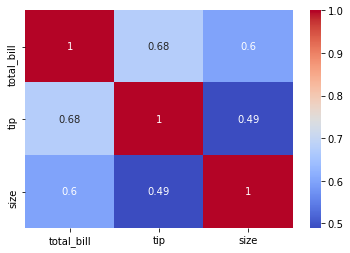

In [59]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [60]:
# for iris
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

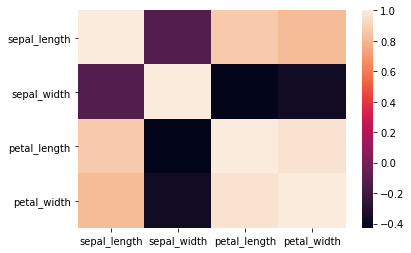

In [61]:
sns.heatmap(iris.corr())

<AxesSubplot:>

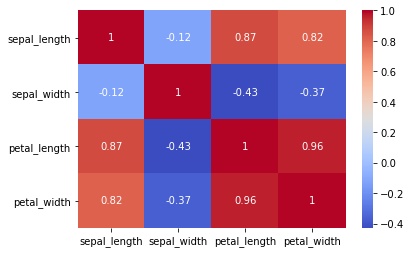

In [62]:
sns.heatmap(iris.corr(),cmap='coolwarm',annot=True)

In [63]:
flights=sns.load_dataset('flights')

In [64]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [65]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

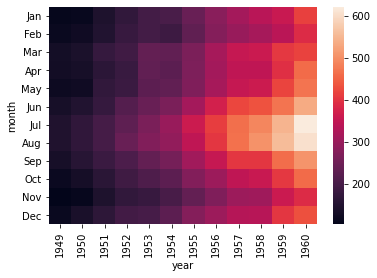

In [66]:
pvflights= flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

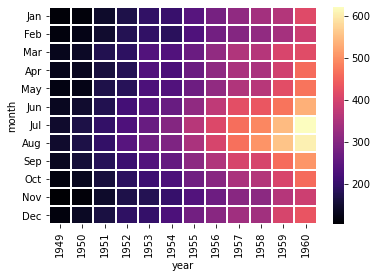

In [67]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

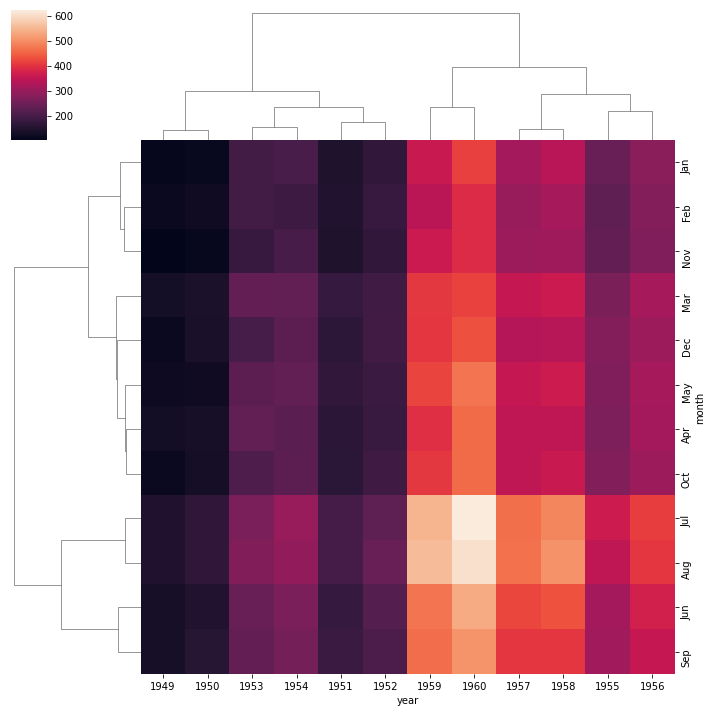

In [68]:
sns.clustermap(pvflights) # this ghraph(that line) is called dendrogram

# EDA-univariates, Bi-variates and Multivariates

# Pandas  Profiling

In [11]:
!pip3 install pandas-profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl


In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diab_data= load_diabetes()

In [4]:
diab_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
df=pd.DataFrame(data=diab_data.data,columns=diab_data.feature_names)

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [8]:
### To Create the Simple report quickly
profile = ProfileReport(df,title='Pandas Profiling Report',explorative=True)

In [9]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

TraitError: n_rows and n_columns must be positive integer

In [13]:
profile.to_file('EDA-datas.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
import os
os.getcwd()

'C:\\Users\\SRILEKYA\\Desktop\\class notes'

In [8]:
import seaborn as sns
iris=sns.load_dataset('iris')
titanic=sns.load_dataset('titanic')


In [9]:
profile = ProfileReport(iris,title='Pandas Profiling Report',explorative=True)

In [10]:
profile.to_file('EDA iris.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

2021-10-25 12:00:35,876 - INFO     - NumExpr defaulting to 4 threads.


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile = ProfileReport(titanic,title='Pandas Profiling Report',explorative=True)

In [ ]:
profile.to_file('EDA titanic.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
!pip3 install dtale

  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3803 sha256=037498900300c929e955e3813a4c881ba20b7faa2a19fda052c3ea8c91bbf5d6
  Stored in directory: c:\users\srilekya\appdata\local\pip\cache\wheels\52\e4\f3\16724791571a955a46d54650510c98c04ab7d339626aee27cc
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4071 sha256=ccfae42394e9d2fcec029f68b6ea3d585dbcd8b18ca249d046247aca7cb68e59
  Stored in directory: c:\users\srilekya\appdata\local\pip\cache\wheels\73\d8\8d\92f612c03c895f19bcc56a6c54be7bb41aaa698012a5624f60
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3896 sha256=9f1f54a5649048013e20a729d261f7d0969c4ef46193a2eef02770bb6a4ad4f0
  Stored in directory: c:\users\srilekya\appdata\local\pip\cache\wheels\a6\fb\f5\4adf241f384634f52028f15eab6a325e77b8766a0a00816bbf
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=6

  Using cached dtale-1.59.1-py2.py3-none-any.whl (11.4 MB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
  Using cached dash_colorscales-0.0.4-py3-none-any.whl
  Using cached dash_daq-0.5.0-py3-none-any.whl
  Using cached dash_bootstrap_components-1.0.0-py3-none-any.whl (207 kB)


In [5]:
import pandas as pd
import dtale
import dtale.app as dtale_app

In [7]:
dtale.show('iris')

Exception: data loaded must be one of the following types: pandas.DataFrame, pandas.Series, pandas.DatetimeIndex, pandas.MultiIndex, xarray.Dataset, numpy.array, numpy.ndarray, list, dict

# handling missing value for credit

In [112]:
x=credit.iloc[:,0:31].values
x1=credit.iloc[:,0:31]

In [113]:
x1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [114]:
y=credit.iloc[:,30:]
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


<AxesSubplot:ylabel='V13'>

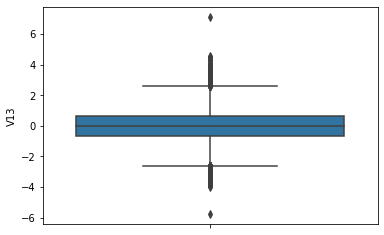

In [104]:
sns.boxplot(y='V13',data=credit)

<AxesSubplot:ylabel='V19'>

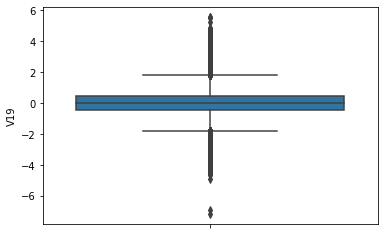

In [105]:
sns.boxplot(y='V19',data=credit)

<AxesSubplot:ylabel='V25'>

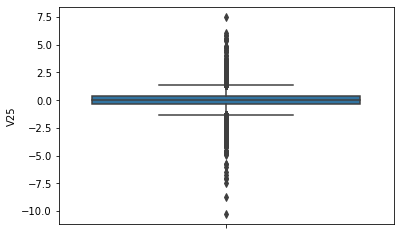

In [106]:
sns.boxplot(y='V25',data=credit)

In [107]:
credit['V13']=credit['V13'].fillna(credit['V13'].median())
credit['V19']=credit['V19'].fillna(credit['V19'].median())
credit['V25']=credit['V25'].fillna(credit['V25'].median())

In [108]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [109]:
from sklearn.impute import SimpleImputer
simple_impute=SimpleImputer(strategy='median')
x[:,13:14]=simple_impute.fit_transform(x[:,13:14]) #here v13 is 14th clmn
x[:,19:20]=simple_impute.fit_transform(x[:,19:20])
x[:,25:26]=simple_impute.fit_transform(x[:,25:26])

In [110]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
dtype: int64

# label encoder,onehot encoder,dummy variable

In [73]:
credit2=credit2.iloc[:,13:26]
credit2

,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539
1,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170
2,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642
3,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376
4,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807
284803,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624
284804,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745
284805,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159


In [ ]:
creditcard2=creditcard2['V13']

In [20]:
import pandas as pd
import seaborn as sns
bank=pd.read_csv("Bank-data.csv")
bank.head()

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117.0,no
1,1,0.767,0,0,1,274.0,yes
2,2,4.858,0,1,0,167.0,no
3,3,4.120,0,0,0,686.0,yes
4,4,4.856,0,1,0,159.0,no


In [14]:
print(bank.shape)

(518, 7)


In [15]:
bank.isnull().sum()

Index             0
interest_rate    11
credit            0
Gender            0
previous          0
duration         14
Churn            12
dtype: int64

In [16]:
x=bank.iloc[:,0:7].values
x

array([[0, 1.334, 0, ..., 0, 117.0, 'no'],
       [1, 0.767, 0, ..., 1, 274.0, 'yes'],
       [2, 4.858, 0, ..., 0, 167.0, 'no'],
       ...,
       [515, 0.879, 0, ..., 0, 290.0, 'no'],
       [516, 0.877, 0, ..., 1, 473.0, 'yes'],
       [517, 4.965, 0, ..., 0, 142.0, 'no']], dtype=object)

In [17]:
x1=bank.iloc[:,0:7]
x1

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117.0,no
1,1,0.767,0,0,1,274.0,yes
2,2,4.858,0,1,0,167.0,no
3,3,4.120,0,0,0,686.0,yes
4,4,4.856,0,1,0,159.0,no
...,...,...,...,...,...,...,...
513,513,1.334,0,1,0,204.0,no
514,514,0.861,0,0,1,806.0,yes
515,515,0.879,0,0,0,290.0,no
516,516,0.877,0,0,1,473.0,yes


In [18]:
y=bank.iloc[:,0]
y

0        0
1        1
2        2
3        3
4        4
      ... 
513    513
514    514
515    515
516    516
517    517
Name: Index, Length: 518, dtype: int64

<AxesSubplot:ylabel='interest_rate'>

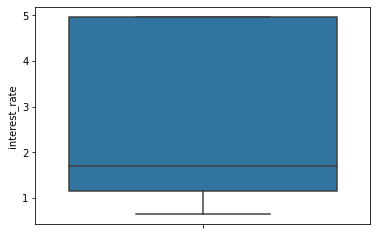

In [21]:
sns.boxplot(y='interest_rate',data=bank)

<AxesSubplot:ylabel='duration'>

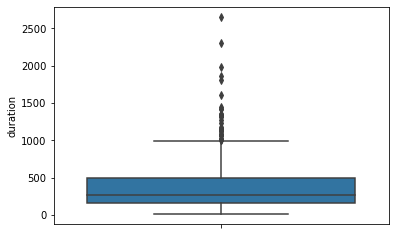

In [22]:
sns.boxplot(y='duration',data=bank)

In [23]:
bank['interest_rate']=bank['interest_rate'].fillna(bank['interest_rate'].mean())
bank['duration']=bank['duration'].fillna(bank['duration'].median())

In [24]:
bank.isnull().sum()

Index             0
interest_rate     0
credit            0
Gender            0
previous          0
duration          0
Churn            12
dtype: int64

In [25]:
bank['Churn'].value_counts()

no     254
yes    252
Name: Churn, dtype: int64

In [26]:
bank['Churn']=bank['Churn'].fillna('no')

In [27]:
bank.isnull().sum()

Index            0
interest_rate    0
credit           0
Gender           0
previous         0
duration         0
Churn            0
dtype: int64

In [28]:
from sklearn.impute import SimpleImputer
simple_impute=SimpleImputer(strategy='mean')
x[:,1:2]=simple_impute.fit_transform(x[:,1:2])



In [29]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5    14
6    12
dtype: int64

In [30]:
simple_impute=SimpleImputer(strategy='median')
x[:,5:6]=simple_impute.fit_transform(x[:,5:6])

In [31]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6    12
dtype: int64

In [32]:
simple_impute=SimpleImputer(strategy='most_frequent')
x[:,6:]=simple_impute.fit_transform(x[:,6:])

In [33]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [73]:
credit2=credit2.iloc[:,13:26]
credit2

,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539
1,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170
2,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642
3,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376
4,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807
284803,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624
284804,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745
284805,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159


In [ ]:
credit2=credit2.iloc[:,13:26]
credit2